# Insights from FordGoBike usage data
## by Hiten Naran

## Investigation Overview

> The goal of this presentation is to highlight key insights obtained from looking at 6 million+ journeys taken since 2017. These insights can help inform distribution and marketing strategy such as ensuring we have enough supply of vehicles when demand is highest and spending more on marketing based on when and where people are likely to hire vehicles. 

## Dataset Overview

> The dataset consists of 6 million plus rows of journeys taken from June 2017 up until July 2020. The data was originally split across multiple csv files which I then concatenated into a single DataFrame after some cleaning steps 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
ford_df_cleaned = pd.read_csv('ford_df_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Hour by Day Usage - Weekends vs Weekdays

> It's really interesting to see that during weekdays the hourly usage follows a bimodal distribution. With 8am and 5pm being the peak hours. This seems to suggest that people are more likely to hire a a vehicle for commuting to work purposes.
> For weekends the hourly usage very much follows a unimodal distrubition with peak usage taking place from 12pm - 4pm. It seems like users are out and about in the City mid-day and at home during the evenings where usage figures start dropping off.

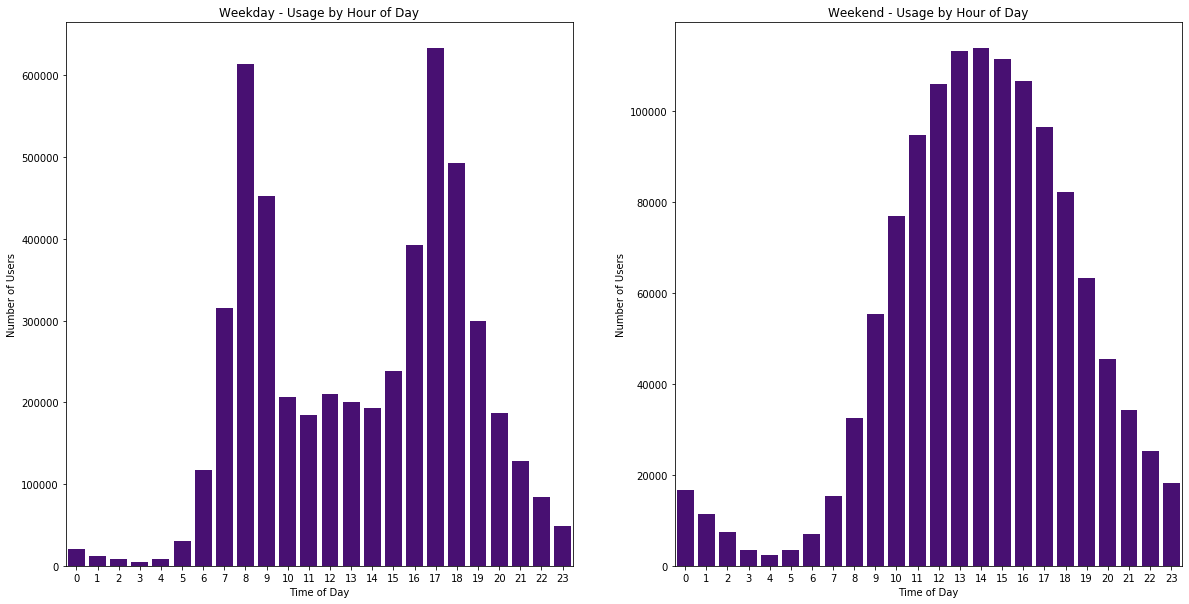

In [4]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])], x = 'start_hour', color = 'indigo')
plt.xlabel('Time of Day')
plt.title('Weekday - Usage by Hour of Day')
plt.ylabel('Number of Users')

plt.subplot(1, 2, 2)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Saturday', 'Sunday'])], x = 'start_hour', color = 'indigo')
plt.xlabel('Time of Day')
plt.title('Weekend - Usage by Hour of Day');
plt.ylabel('Number of Users');

## Usage by User Type - Day of Week View

> Usage levels are consistent for customers throughout the week, whilst for subscribers there is a big drop off going into the weekend. This could be due to the vast number of subscribers renting predominantly for work commuting purposes.

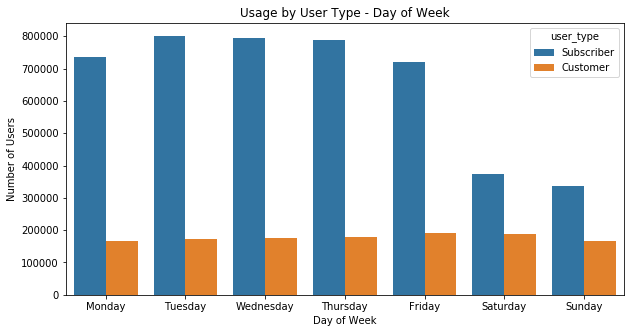

In [5]:
plt.figure(figsize = (10, 5));
sb.countplot(data = ford_df_cleaned, x = 'start_day_of_week', hue = 'user_type', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.title('Usage by User Type - Day of Week');
plt.ylabel('Number of Users');
plt.xlabel('Day of Week');

## Duration usage and distance covered by user type

> It is really interesting to see that customers are more likely to cover greater distance whilst renting a vehicle based on higher median and means values in addition to the duration of and individual session being longer.

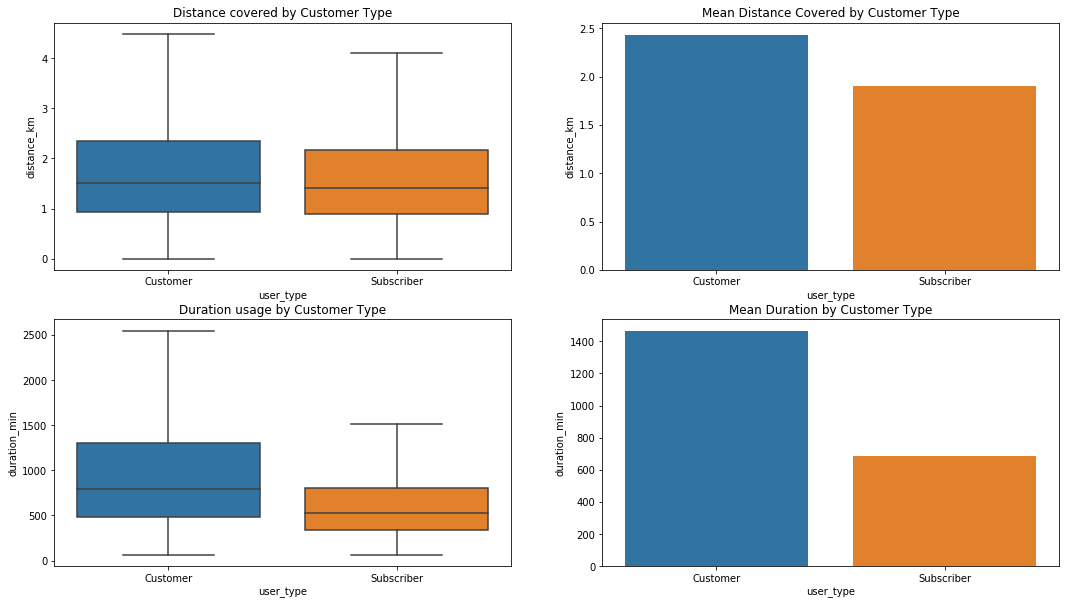

In [6]:
distance_mean_user = ford_df_cleaned.groupby('user_type').distance_km.mean().reset_index()
duration_mean_user = ford_df_cleaned.groupby('user_type').duration_min.mean().reset_index()

plt.figure(figsize = (18, 10));
plt.subplot(2, 2, 1);
sb.boxplot(data = ford_df_cleaned, x = 'user_type', y = 'distance_km', showfliers = False, order = ['Customer', 'Subscriber']);
plt.title('Distance covered by Customer Type')

plt.subplot(2, 2, 2)
sb.barplot(data = distance_mean_user, x = 'user_type', y = 'distance_km', order = ['Customer', 'Subscriber']);
plt.title('Mean Distance Covered by Customer Type');

plt.subplot(2, 2, 3)
sb.boxplot(data = ford_df_cleaned, x = 'user_type', y = 'duration_min', showfliers = False, order = ['Customer', 'Subscriber']);
plt.title('Duration usage by Customer Type')

plt.subplot(2, 2, 4)
sb.barplot(data = duration_mean_user, x = 'user_type', y = 'duration_min', order = ['Customer', 'Subscriber']);
plt.title('Mean Duration by Customer Type');

## Heatmap of most popular journeys taken

> From looking at the top journeys taken (starting station -> ending station), it seems that **Embarcadero at Sansome St** is a popular station that features across journeys.

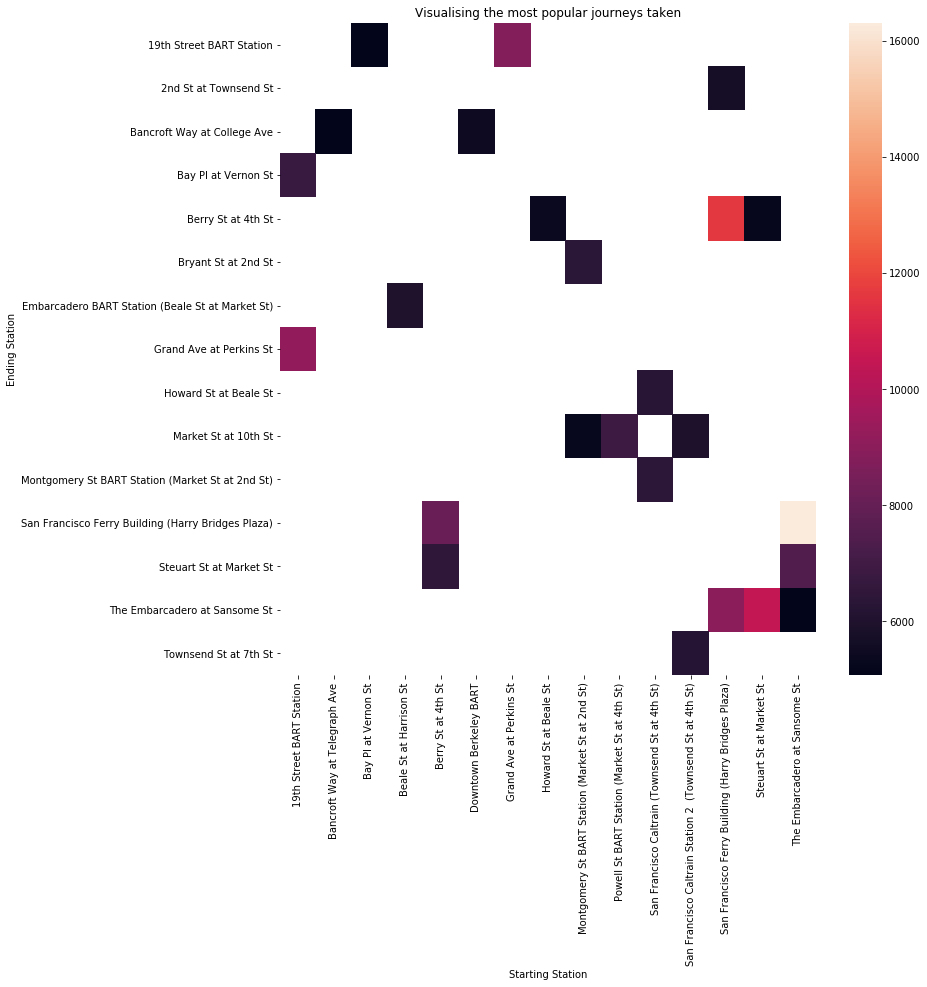

In [12]:
#Create new dataframe enabling us to initialise work for building out a heatmap
journey_df = ford_df_cleaned.groupby(['start_station_name', 'end_station_name']).bike_id.count().reset_index()
journey_df.rename(columns = {'bike_id': 'count'}, inplace = True)
journey_df.sort_values(by = 'count', ascending = False, inplace = True)

#There are 69K rows. Let's limit the rows to top 25 journeys taken and build out a heatmap from there
journey_df_25 = journey_df.head(25)
journey_df_25_pivot = journey_df_25.pivot(index = 'start_station_name', columns = 'end_station_name', values = 'count')

#Build Seaborn HeatMap
plt.figure(figsize = (12, 12))
sb.heatmap(journey_df_25_pivot);
plt.xlabel('Starting Station');
plt.ylabel('Ending Station');
plt.title('Visualising the most popular journeys taken');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_ford.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!